In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.cluster import KMeans


In [8]:
df = df[["PetalLengthCm","PetalWidthCm"]]

In [10]:
model = KMeans(n_clusters = 3)

In [12]:
y_pred  = model.fit_predict(df)

C:\Users\adhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
df["clusters"] = y_pred

C:\Users\adhim\AppData\Local\Temp\ipykernel_15628\3658252929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"] = y_pred


In [15]:
df

,PetalLengthCm,PetalWidthCm,Clusters,clusters
0,1.4,0.2,1,1
1,1.4,0.2,1,1
2,1.3,0.2,1,1
3,1.5,0.2,1,1
4,1.4,0.2,1,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [17]:
model.inertia_

31.387758974358984

In [24]:
df.clusters.unique()

array([1, 2, 0])

In [18]:
model.cluster_centers_

array([[ 5.59583333e+00,  2.03750000e+00,  2.00000000e+00],
       [ 1.46400000e+00,  2.44000000e-01,  1.00000000e+00],
       [ 4.26923077e+00,  1.34230769e+00, -8.88178420e-16]])

In [25]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]


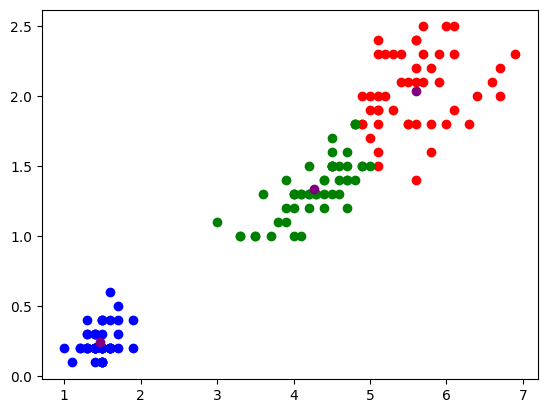

In [33]:
#draw the scatterplot
import matplotlib.pyplot as plt
plt.scatter(df1.iloc[:, 0],df1.iloc[:, 1],color = "Red")
plt.scatter(df2.iloc[:, 0],df2.iloc[:, 1],color = "Blue")
plt.scatter(df3.iloc[:, 0],df3.iloc[:, 1],color = "Green")
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1],color = "purple")
plt.show()


C:\Users\adhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

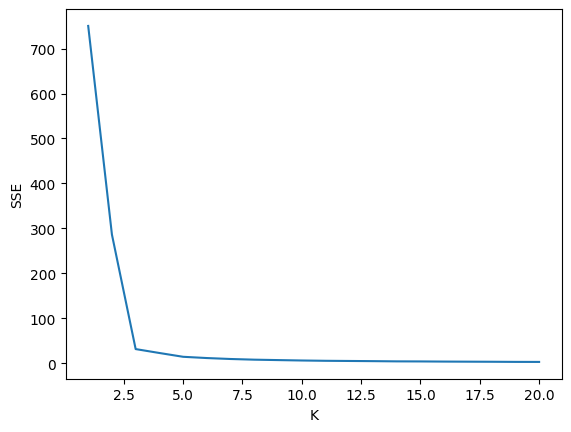

In [35]:
sse = []
K = np.arange(1,21)
for k in K:
    model = KMeans(n_clusters = k)
    model.fit(df)
    sse.append(model.inertia_)
plt.plot(K,sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

    